# Education Revenue - Full Business Analysis

**Project:** Education company - New enrollments/contracts revenue analysis (full-stack)

**Contents:**
- Load dataset (8k rows)
- EDA & KPIs
- Time-series & seasonality
- Team & sales rep performance
- Churn deep dive & logistic model
- Cohort analysis & retention
- RFM segmentation
- Funnel & conversion analysis
- Business insights and recommended actions

_This notebook is ready to run end-to-end. Each code cell is documented._

In [1]:
#Imports and settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

pd.set_option("display.max_columns", 200)
plt.rcParams["figure.figsize"] = (10,5)
sns.set(style="whitegrid")

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [18]:
#Show all columns upon viewing dataframe
pd.set_option("display.max_columns", None)

In [19]:
df = pd.read_csv("datasets/enrollment_data.csv")

In [20]:
print(df.head())

         date student_id   course_category        team sales_rep  \
0  2024-07-31   STU_0001  Business English  Team Delta    Rep_12   
1  2024-07-15   STU_0002  Business English  Team Sigma    Rep_10   
2  2024-03-18   STU_0003      Kids English  Team Delta    Rep_10   
3  2024-02-28   STU_0004  Business English  Team Sigma    Rep_14   
4  2024-03-05   STU_0005             TOEIC  Team Alpha     Rep_2   

   contract_value contract_status  
0         1326000          Active  
1         1659000          Active  
2         1060000          Active  
3         1494000          Active  
4         1330000          Active  


In [21]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             2000 non-null   object
 1   student_id       2000 non-null   object
 2   course_category  2000 non-null   object
 3   team             2000 non-null   object
 4   sales_rep        2000 non-null   object
 5   contract_value   2000 non-null   int64 
 6   contract_status  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [22]:
df.describe()

,contract_value
count,2000.000
mean,1109945.500
std,512268.248
min,200000.000
25%,688000.000
50%,1127500.000
75%,1541250.000
max,1999000.000


In [23]:
df.isnull().sum()

date               0
student_id         0
course_category    0
team               0
sales_rep          0
contract_value     0
contract_status    0
dtype: int64

In [24]:
#Convert date column to datetime data type
df["date"] = pd.to_datetime(df["date"])

In [25]:
#Create month and year columns
df["year_month"] = df["date"].dt.to_period("M").astype(str)

In [26]:
#Filter active contracts only
df_active = df[df["contract_status"] == "Active"]

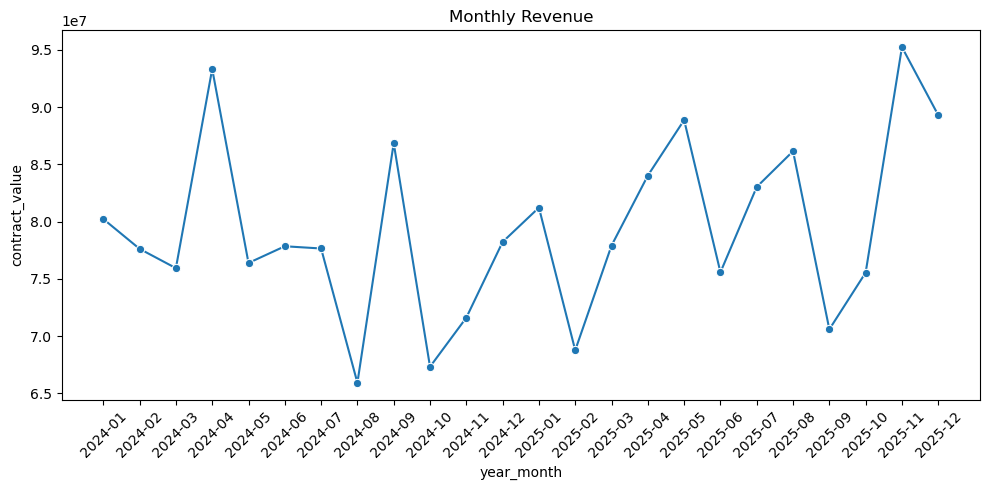

In [27]:
#Monthly revenue

#Create dataframe
monthly_revenue = (
    df_active.groupby("year_month")["contract_value"]
    .sum()
    .reset_index()
)

#Plot
plt.figure(figsize=(10,5))
sns.lineplot(
    data=monthly_revenue,
    x="year_month",
    y="contract_value",
    marker="o"
    )
plt.title("Monthly Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

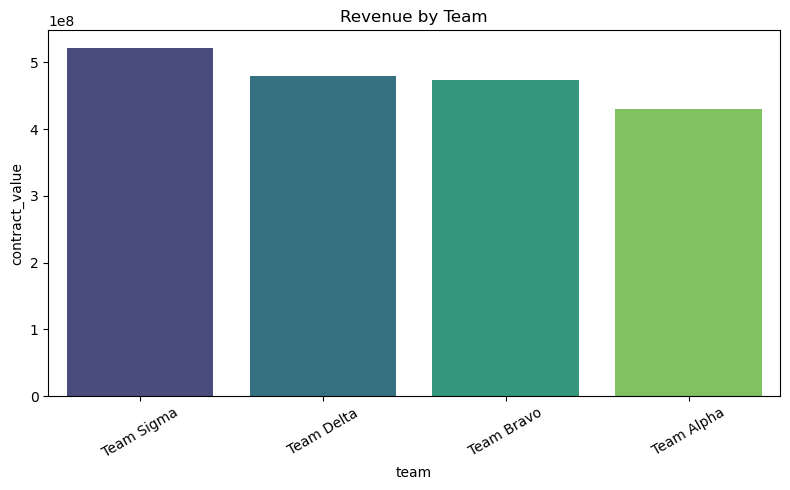

In [28]:
#Revenue by team

#Create dataframe
team_revenue = (
    df_active.groupby("team")["contract_value"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

#Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=team_revenue,
    x="team",
    y="contract_value",
    palette="viridis"
)
plt.title("Revenue by Team")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

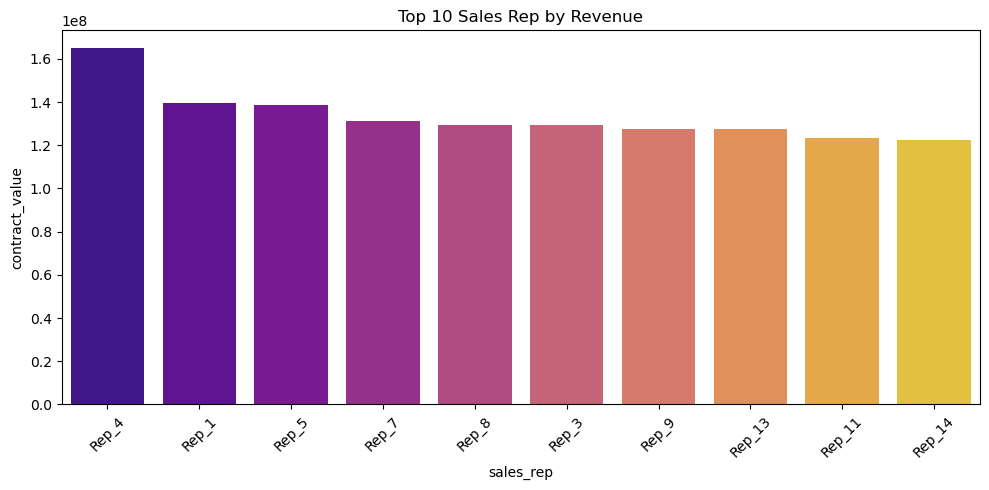

In [29]:
#Top sales rep

#Create dataframe
sales_rep_revenue = (
    df_active.groupby("sales_rep")["contract_value"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_sales_rep = sales_rep_revenue.head(10)

#Plot
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_sales_rep,
    x="sales_rep",
    y="contract_value",
    palette="plasma"
)
plt.title("Top 10 Sales Rep by Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
#Revenue by Course

#Create dataframe
course_revenue = (
    df_active.groupby("course_category")["contract_value"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

#Plot
fig = px.pie(
    course_revenue,
    values="contract_value",
    names="course_category",
    title="Revenue Distribution by Course",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

In [31]:
#Churn rate

#Create dataframe
cancel_rate = (
    df.groupby("contract_status")["student_id"]
    .count()
    .reset_index()
)

cancel_rate["percent"] = 100 * cancel_rate["student_id"] / cancel_rate["student_id"].sum()
print("\n--- Contract Status ---")
print(cancel_rate)

#Plot
fig = px.bar(
    cancel_rate,
    x="contract_status",
    y="percent",
    title="Active vs Cancelled Contract Status",
    text=cancel_rate["percent"].round(2)
)
fig.update_traces(textposition="outside")
fig.show()


--- Contract Status ---
  contract_status  student_id  percent
0          Active        1708     85.4
1       Cancelled         292     14.6
